Import Packages

In [134]:
import requests
import pandas as pd
import json
access_token = "ACCESS_TOKEN"

Get Playlist "Spotify's Most Played All Time"

In [2]:
playlist_id = '2YRe7HRKNRvXdJBp9nXFza'

# The Spotify Web API endpoint for getting playlist details
url = f"https://api.spotify.com/v1/playlists/{playlist_id}"

# The necessary HTTP header with your access token
headers = {
    "Authorization": f"Bearer {access_token}"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    playlist_details = response.json()
    print(playlist_details)
else:
    print(f"Error: Could not retrieve playlist - HTTP {response.status_code}")


{'collaborative': False, 'description': 'Blinding Lights by The Weekend is the new all-time streams leader as of 2023! The Most Streamed Tracks Ever on Spotify! Cumulative playlist of songs - ordered by play count - that have at least 500 million streams. I&#x27;ve been updating this since 2012, and strive to be accurate. Enjoy!', 'external_urls': {'spotify': 'https://open.spotify.com/playlist/2YRe7HRKNRvXdJBp9nXFza'}, 'followers': {'href': None, 'total': 84513}, 'href': 'https://api.spotify.com/v1/playlists/2YRe7HRKNRvXdJBp9nXFza', 'id': '2YRe7HRKNRvXdJBp9nXFza', 'images': [{'height': None, 'url': 'https://image-cdn-ak.spotifycdn.com/image/ab67706c0000bebb8e3d148d9059f7a7ba10d06a', 'width': None}], 'name': "Spotify's Most Played All-Time [Updated Weekly] | Most Streamed | Top Played | 500Mil+", 'owner': {'display_name': 'Ray Fontaine', 'external_urls': {'spotify': 'https://open.spotify.com/user/1221028518'}, 'href': 'https://api.spotify.com/v1/users/1221028518', 'id': '1221028518', 't

In [3]:
# print(type(playlist_details))
# print(len(playlist_details))
# print(playlist_details.keys())
# print(len(playlist_details["tracks"]["items"]))
# print(playlist_details["tracks"])

100
{'href': 'https://api.spotify.com/v1/playlists/2YRe7HRKNRvXdJBp9nXFza/tracks?offset=0&limit=100', 'items': [{'added_at': '2020-03-20T04:54:59Z', 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/1221028518'}, 'href': 'https://api.spotify.com/v1/users/1221028518', 'id': '1221028518', 'type': 'user', 'uri': 'spotify:user:1221028518'}, 'is_local': False, 'primary_color': None, 'track': {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ'}, 'href': 'https://api.spotify.com/v1/artists/1Xyo4u8uXC1ZmMpatF05PJ', 'id': '1Xyo4u8uXC1ZmMpatF05PJ', 'name': 'The Weeknd', 'type': 'artist', 'uri': 'spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA',

Get all tracks from the playlist

In [4]:
# Your access token and playlist ID
playlist_id = '2YRe7HRKNRvXdJBp9nXFza'

# On
def get_playlist_tracks(access_token, playlist_id):
    url = f"https://api.spotify.com/v1/playlists/{playlist_id}/tracks"

    headers = {
        "Authorization": f"Bearer {access_token}"
    }
    
    tracks = []
    limit = 100
    offset = 0
    
    while True:
        # Add query parameters for limit and offset
        params = {'limit': limit, 'offset': offset}
        
        # Make the GET request to the Spotify API
        response = requests.get(url, headers=headers, params=params)
        
        if response.status_code != 200:
            print(f"Failed to retrieve tracks: {response.status_code}")
            break
        
        # Extract tracks from the current page
        page = response.json()
        tracks.extend(page['items'])

        if len(page['items']) < limit:
            break  # Exit the loop if no more tracks are available
        
        offset += limit
    
    return tracks

tracks = get_playlist_tracks(access_token, playlist_id)

print(f"Total tracks retrieved: {len(tracks)}")


Total tracks retrieved: 810


In [6]:
with open('tracks.json', 'w') as f:
    json.dump(tracks, f)

In [135]:
# Load JSON:
with open('tracks.json', 'r') as f:
    tracks = json.load(f)

Get track features of each song

In [4]:
audio_features_all = []
track_failed_to_process = []

headers = {
    "Authorization": f"Bearer {access_token}"
}

num = 0

for track in tracks:
    try:
        num += 1
        track_id = track["track"]["id"]
        track_name = track["track"]["name"]

        url = f"https://api.spotify.com/v1/audio-features/{track_id}"

        # Get request to the Spotify API
        response = requests.get(url, headers=headers)
        audio_features = response.json()
        name_kv = {'name': track_name}
        audio_features.update(name_kv)
        audio_features_all.append(audio_features)
        print(audio_features, num) 

    except:
        track_failed_to_process.append(track)


In [49]:
# df = pd.DataFrame(audio_features_all)
# df.to_csv('df_audio_features.csv', index=False) 

In [129]:
# To load
df = pd.read_csv('df_audio_features.csv') 
df_id_name = df[['id', 'name']]
# df

In [131]:
# Drop the unwanted columns

# b4 only use danceability	energy	loudness liveness valence tempo
# now try energy and tempo

columns_to_drop = ['key', 'type', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', "mode", "speechiness", "acousticness", "instrumentalness", "danceability", "loudness", "liveness", "valence"]
columns_to_drop_more = ['id', 'name']
df = df.drop(columns=columns_to_drop)
df_ml = df.drop(columns=columns_to_drop_more)
columns = df.columns
new_col_order = columns[-2:].tolist() + columns[:-2].tolist()
df = df[new_col_order]

In [132]:
# %conda install sklearn

# Standardize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_ml)
standardized_df = pd.DataFrame(standardized_data, columns=df_ml.columns)

In [133]:
df = pd.concat([df[['id', 'name']], standardized_df], axis=1) # concat back 
df.set_index(['id', 'name'], inplace=True)
df.to_csv("probs_3_components_new.csv")

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture as GMM
from sklearn import metrics
import pandas as pd

In [116]:
# Silohuette coefficient
n_clusters = np.arange(2, 20)
sils = []
sils_err = []
iterations = 20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm = GMM(n, n_init=2).fit(df) 
        labels = gmm.predict(df)
        sil = metrics.silhouette_score(df, labels, metric='euclidean')
        tmp_sil.append(sil)
    tmp_sil = np.array(tmp_sil)
    dx = np.argsort(tmp_sil)[:int(iterations/5)]
    val = np.mean(tmp_sil[dx])
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

Text(0, 0.5, 'Score')

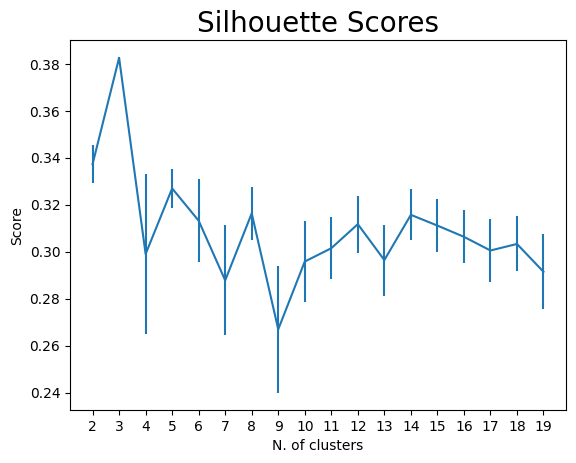

In [117]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

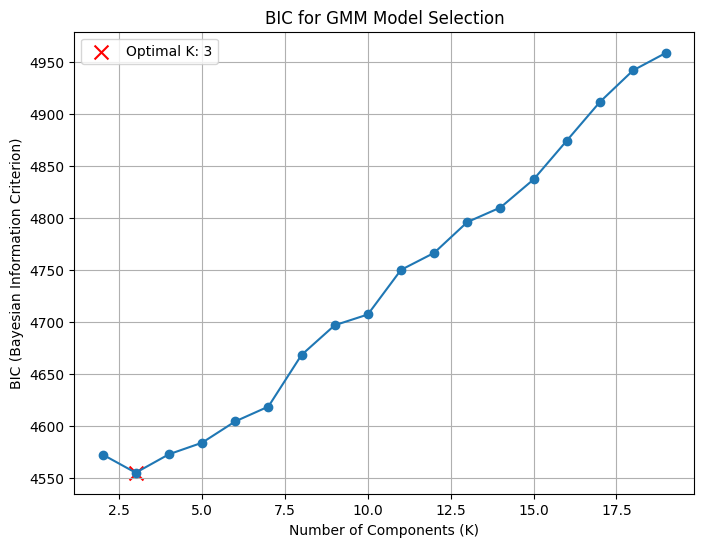

Optimal number of components (K) according to BIC: 3


In [118]:
# Bayesian information criterion (BIC) 1
n_components = np.arange(2, 20)
bic_values = []
# Fit GMM models for different K values and calculate BIC
for n in n_components:
    gmm = GMM(n_components=n, n_init=2, random_state=0)
    gmm.fit(df)
    bic = gmm.bic(df)
    bic_values.append(bic)

# Find the number of components (K) that minimizes BIC
optimal_n_components = n_components[np.argmin(bic_values)]

# Plot the BIC values against the number of components
plt.figure(figsize=(8, 6))
plt.plot(n_components, bic_values, marker='o')
plt.xlabel("Number of Components (K)")
plt.ylabel("BIC (Bayesian Information Criterion)")
plt.title("BIC for GMM Model Selection")
plt.grid(True)

# Find the number of components (K) that minimizes BIC
optimal_n_components = n_components[np.argmin(bic_values)]

# Mark the optimal point on the plot
plt.scatter(optimal_n_components, min(bic_values), c='red', marker='x', s=100, label=f'Optimal K: {optimal_n_components}')
plt.legend()

plt.show()

print("Optimal number of components (K) according to BIC:", optimal_n_components)

In [119]:
# Bayesian information criterion (BIC) 2
n_clusters = np.arange(2, 20)
bics = []
bics_err = []
iterations = 20
for n in n_clusters:
    tmp_bic =[]
    for _ in range(iterations):
        gmm = GMM(n, n_init=2).fit(df)
        tmp_bic.append(gmm.bic(df))
    tmp_bic = np.array(tmp_bic)
    dx = np.argsort(tmp_bic)[:int(iterations/5)]
    val = np.mean(tmp_bic[dx])
    err = np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

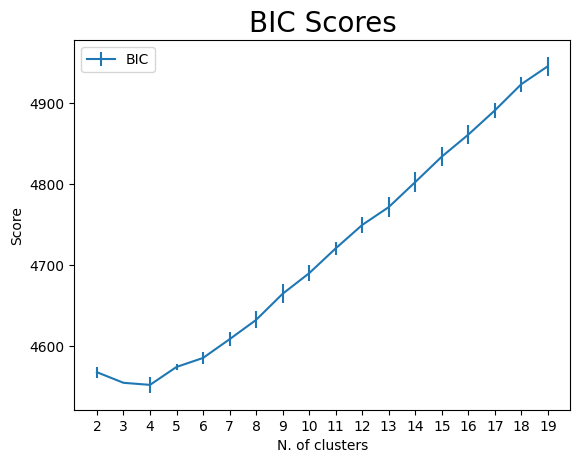

In [120]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

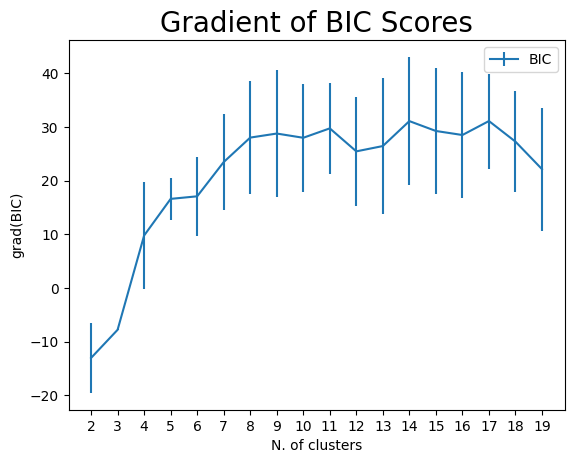

In [121]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()

In [122]:
# gmm=GMM(n_components=3, random_state=0).fit(df)
# probs = gmm.predict_proba(df)
# probs_df = pd.DataFrame(probs)

# probs_df = pd.concat([df_id_name, probs_df], axis=1) # concat back 
# probs_df.set_index(['id', 'name'], inplace=True)
# probs_df.to_csv("probs_3_components_copy_new.csv", index=0)

In [123]:
probs_df_old = pd.read_csv("probs_3_components_copy_new.csv")
probs_df = probs_df_old[["0", "1", "2"]]
probs_df.to_csv("probs_3_components_new.csv", index=0)

In [124]:
new_df = pd.read_csv("probs_3_components_new.csv")
new_df

,0,1,2
0,0.004579,0.022184,0.973236
1,0.787766,0.204712,0.007522
2,0.005776,0.968725,0.025499
3,0.063454,0.932467,0.004079
4,0.000013,0.015117,0.984870
...,...,...,...
803,0.312739,0.660344,0.026917
804,0.137730,0.007025,0.855245
805,0.953293,0.030562,0.016145
806,0.006231,0.616324,0.377446


In [125]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(standardized_df), columns=['PC1', 'PC2'])

In [126]:
assigned_cluster = new_df.idxmax(axis=1)

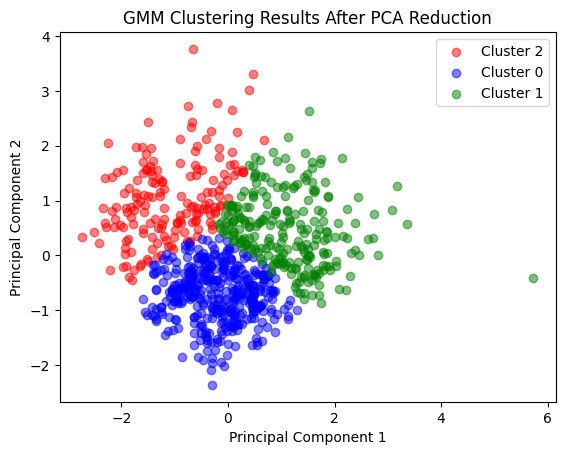

In [127]:
# Add the cluster assignments to the PCA result
df_pca['Cluster'] = assigned_cluster.values
import matplotlib.pyplot as plt

colors = ['red', 'blue', 'green'] 
for cluster, color in zip(df_pca['Cluster'].unique(), colors):
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], color=color, label=f'Cluster {cluster}', alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('GMM Clustering Results After PCA Reduction')
plt.show()
